# Detecção de Transações Fraudulentas

Este notebook aborda o problema de detecção de transações fraudulentas utilizando o conjunto de dados `../data/databaseFraude.csv`. O objetivo é desenvolver um modelo preditivo para identificar se uma transação é fraude ou não.

## Etapas do Notebook:
1. **Análise Exploratória de Dados (EDA)**
2. **Treinamento de Modelos (KNN, Árvore de Decisão, Regressão Logística)**
3. **Identificação das Features Mais Importantes**
4. **Avaliação dos Modelos (Matriz de Confusão, Acurácia, Precisão, Recall)**
5. **Ajustes e Melhoria de Desempenho**

## 1. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Carregamento dos dados
data = pd.read_csv('../data/databaseFraude.csv')

# Apenas dados numéricos
numeric_data = data.select_dtypes(include=['number'])

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 2. Análise Exploratória de Dados (EDA)

In [2]:
# Informações gerais sobre o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
# Estatísticas descritivas
numeric_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
# Verificar valores nulos
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

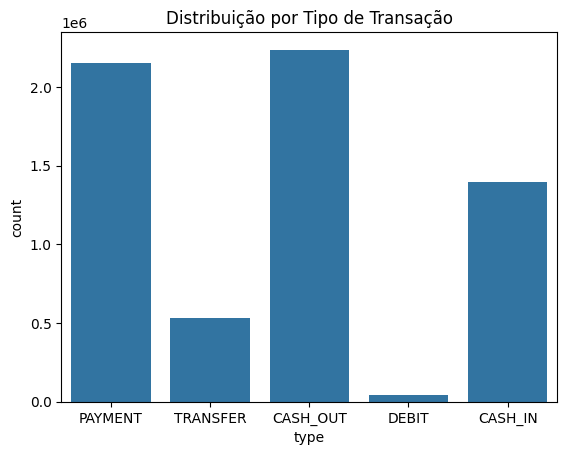

In [5]:
# Distribuição das transações por tipo
sns.countplot(x='type', data=data)
plt.title('Distribuição por Tipo de Transação')
plt.show()

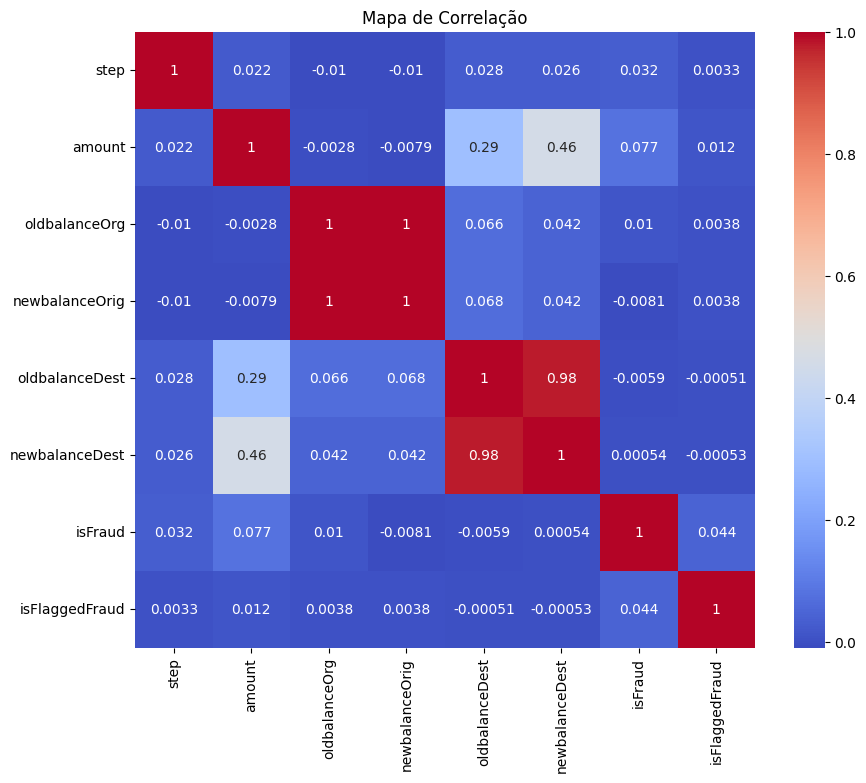

In [6]:
# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

## 3. Preparação dos Dados

In [7]:
# Remoção de colunas irrelevantes
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# Tratamento de valores nulos
data = data.dropna()

# Separação de features (X) e target (y)
X = numeric_data.drop('isFraud', axis=1)
y = numeric_data['isFraud']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Treinamento e Avaliação dos Modelos

In [8]:
# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Acurácia do KNN:', accuracy_score(y_test, y_pred_knn))

Acurácia do KNN: 0.9994499121431109


In [9]:
# Modelo Árvore de Decisão
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Acurácia da Árvore de Decisão:', accuracy_score(y_test, y_pred_tree))

Acurácia da Árvore de Decisão: 0.9990986417544974


In [15]:
# Modelo Regressão Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print('Acurácia da Regressão Logística:', accuracy_score(y_test, y_pred_logreg))

Acurácia da Regressão Logística: 0.9992738840289064


## 5. Comparação de Métricas

In [16]:
# Comparação de precisão e recall
print('Precisão do KNN:', precision_score(y_test, y_pred_knn))
print('Recall do KNN:', recall_score(y_test, y_pred_knn))

print('Precisão da Árvore de Decisão:', precision_score(y_test, y_pred_tree))
print('Recall da Árvore de Decisão:', recall_score(y_test, y_pred_tree))

print('Precisão da Regressão Logística:', precision_score(y_test, y_pred_logreg))
print('Recall da Regressão Logística:', recall_score(y_test, y_pred_logreg))

Precisão do KNN: 0.8522205206738132
Recall do KNN: 0.687037037037037
Precisão da Árvore de Decisão: 0.7430626927029804
Recall da Árvore de Decisão: 0.4462962962962963
Precisão da Regressão Logística: 0.9037122969837587
Recall da Regressão Logística: 0.4808641975308642


## 6. Análise de Importância das Features

In [17]:
# Importância das features na Árvore de Decisão
importances = tree.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

step: 0.10193125461577672
amount: 0.029988671515710934
oldbalanceOrg: 0.6114603952917448
newbalanceOrig: 0.25589763974930624
oldbalanceDest: 0.00072203882746128
newbalanceDest: 0.0
isFlaggedFraud: 0.0


## 7. Matriz de Confusão

In [18]:
# Matriz de confusão para o KNN
print('Matriz de Confusão do KNN:')
print(confusion_matrix(y_test, y_pred_knn))

Matriz de Confusão do KNN:
[[1270711     193]
 [    507    1113]]


## 8. Ajustes e Melhoria de Desempenho

In [19]:
# Ajuste de hiperparâmetros para o KNN
knn_tuned = KNeighborsClassifier(n_neighbors=10)
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)
print('Acurácia do KNN Ajustado:', accuracy_score(y_test, y_pred_knn_tuned))

Acurácia do KNN Ajustado: 0.9994522696624976


# Visualização melhor de todos os Dados e concluindo o Estudo de Caso:

=== Análise Exploratória de Dados ===

Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB

Estatísticas Descritivas:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   


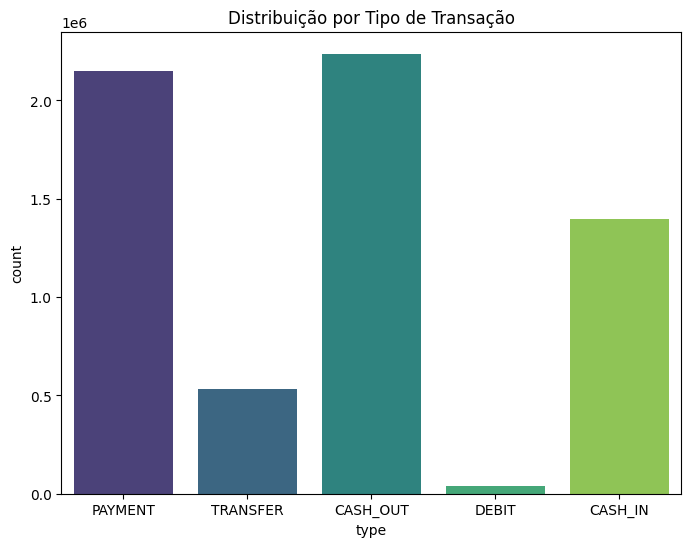

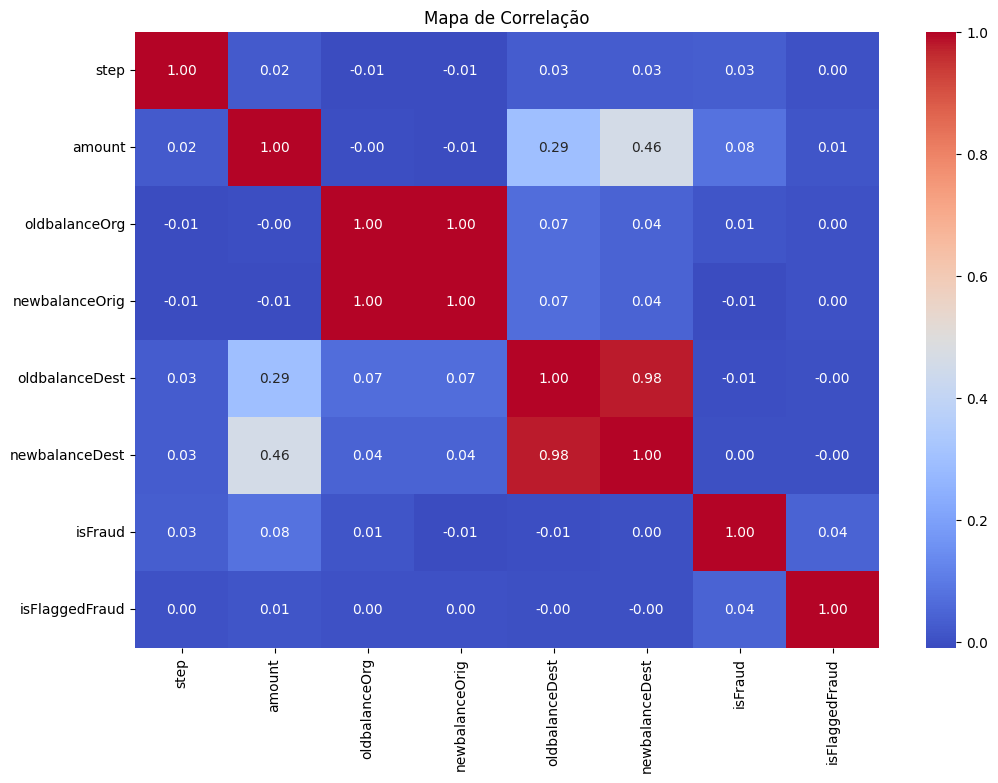


=== Resultados do Modelo KNN ===
Acurácia: 1.00
Precisão: 0.85
Recall: 0.69

Matriz de Confusão:


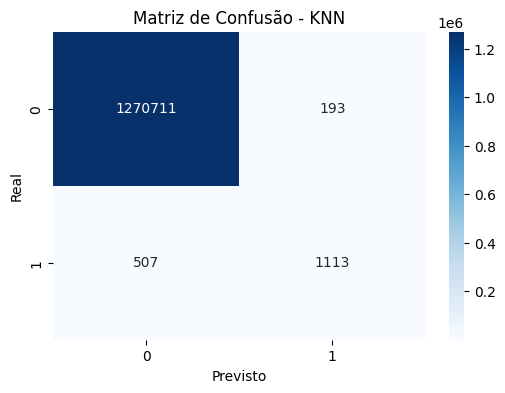


=== Resultados do Modelo Árvore de Decisão ===
Acurácia: 1.00
Precisão: 0.74
Recall: 0.45

Matriz de Confusão:


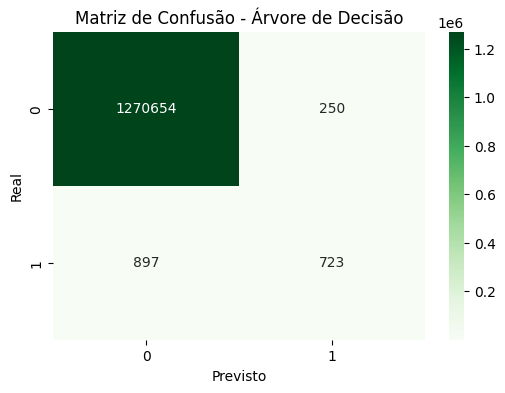


=== Resultados do Modelo Regressão Logística ===
Acurácia: 1.00
Precisão: 0.90
Recall: 0.48

Matriz de Confusão:


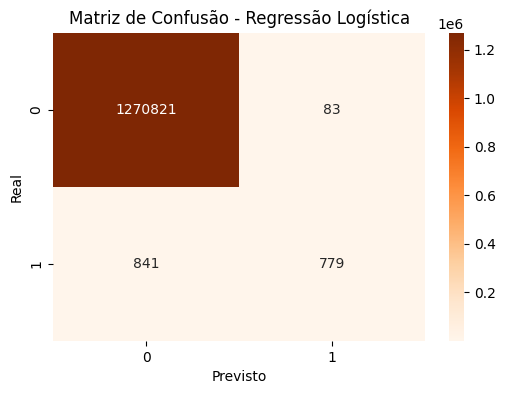


=== Resultados do Modelo KNN Ajustado ===
Acurácia: 1.00
Precisão: 0.90
Recall: 0.64

Matriz de Confusão:


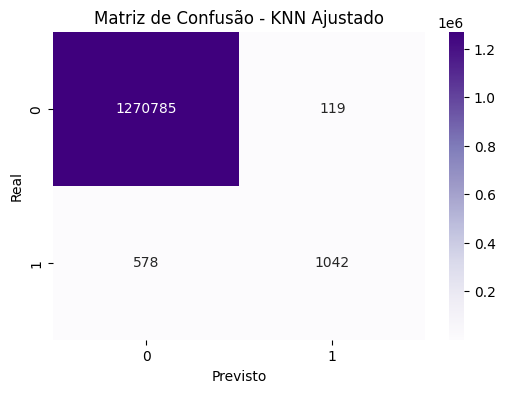


=== Importância das Features (Árvore de Decisão) ===
          Feature  Importância
2   oldbalanceOrg     0.611460
3  newbalanceOrig     0.255898
0            step     0.101931
1          amount     0.029989
4  oldbalanceDest     0.000722
5  newbalanceDest     0.000000
6  isFlaggedFraud     0.000000


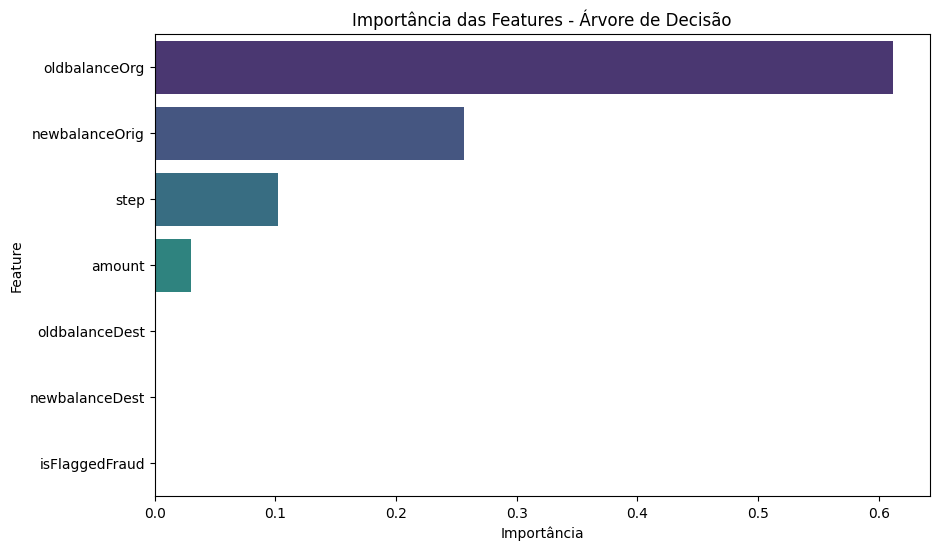

In [23]:
# Melhorias nos prints e visualizações

# Consolidando os resultados e visualizações
print("=== Análise Exploratória de Dados ===\n")
print("Informações Gerais do Dataset:")
data.info()
print("\nEstatísticas Descritivas:")
print(numeric_data.describe())
print("\nValores Nulos por Coluna:")
print(data.isnull().sum())

# Gráficos da EDA
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data, hue='type', palette="viridis", dodge=False, legend=False)
plt.title('Distribuição por Tipo de Transação')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()

# Função para exibir resultados dos modelos
def exibir_resultados_modelo(nome_modelo, y_pred, cmap):
    print(f"\n=== Resultados do Modelo {nome_modelo} ===")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print("\nMatriz de Confusão:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=cmap)
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

# Resultados dos Modelos
modelos = {
    "KNN": (y_pred_knn, "Blues"),
    "Árvore de Decisão": (y_pred_tree, "Greens"),
    "Regressão Logística": (y_pred_logreg, "Oranges"),
    "KNN Ajustado": (y_pred_knn_tuned, "Purples")
}

for nome_modelo, (y_pred, cmap) in modelos.items():
    exibir_resultados_modelo(nome_modelo, y_pred, cmap)

# Importância das Features (Árvore de Decisão)
print("\n=== Importância das Features (Árvore de Decisão) ===")
importances = tree.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importância": importances
}).sort_values(by="Importância", ascending=False)
print(feature_importance_df)

# Visualização da importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importância", y="Feature", data=feature_importance_df, hue="Feature", palette="viridis", dodge=False, legend=False)
plt.title("Importância das Features - Árvore de Decisão")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.show()